In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('case-hosp-death.csv')
df.head()

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,2/29/20,1,14,0
1,3/1/20,1,4,0
2,3/2/20,0,22,0
3,3/3/20,2,20,0
4,3/4/20,5,22,0


In [23]:
cols = list(df.columns.values)
deaths = df.drop(columns = [cols[1], cols[2]])
deaths.head(-5)

,DATE_OF_INTEREST,DEATH_COUNT
0,2/29/20,0
1,3/1/20,0
2,3/2/20,0
3,3/3/20,0
4,3/4/20,0
...,...,...
65,5/4/20,123
66,5/5/20,107
67,5/6/20,110
68,5/7/20,92


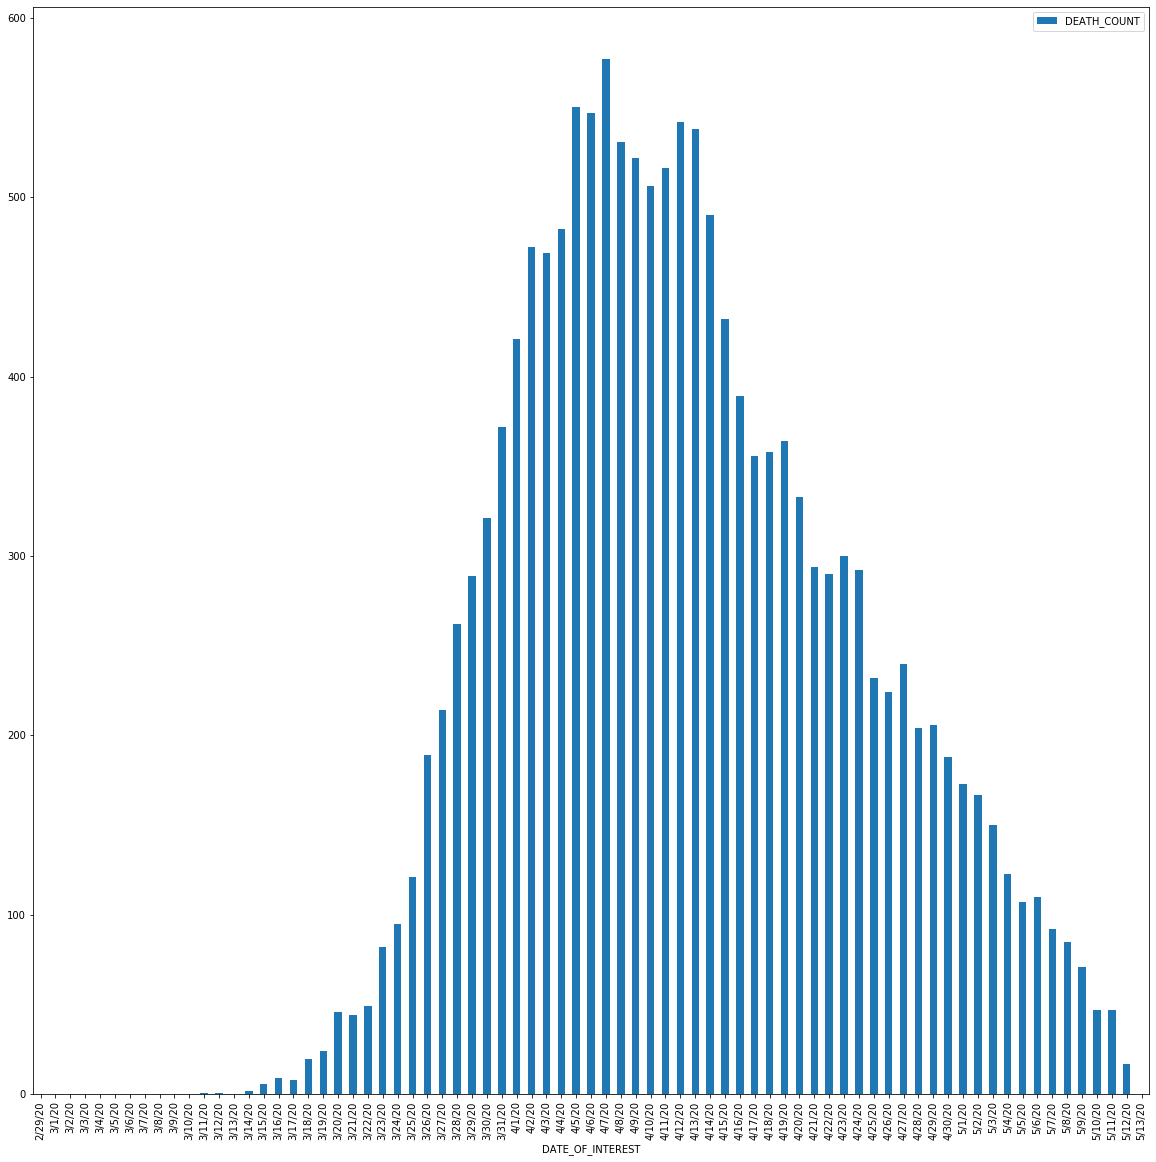

In [24]:
#Model of current NY deaths
NYCPLOT = deaths.plot(kind='bar', x='DATE_OF_INTEREST', y='DEATH_COUNT', figsize = (20,20))

In [25]:
new_df = deaths
new_df[new_df['DATE_OF_INTEREST'] == '4/7/20']
increasing_df = pd.DataFrame(new_df[:39])
decreasing_df = pd.DataFrame(new_df[39:])

for i in range(len(increasing_df)):
    increasing_df.loc[i, 'Days since start'] = int(i)

for j in range(len(decreasing_df)):
    decreasing_df.loc[j + 39, 'Days since start'] = int(j +39)
    
increasing_df = increasing_df[['DATE_OF_INTEREST', 'Days since start', 'DEATH_COUNT']]

decreasing_df = decreasing_df[['DATE_OF_INTEREST', 'Days since start', 'DEATH_COUNT']]
decreasing_df

,DATE_OF_INTEREST,Days since start,DEATH_COUNT
39,4/8/20,39.0,531
40,4/9/20,40.0,522
41,4/10/20,41.0,506
42,4/11/20,42.0,516
43,4/12/20,43.0,542
44,4/13/20,44.0,538
45,4/14/20,45.0,490
46,4/15/20,46.0,432
47,4/16/20,47.0,389
48,4/17/20,48.0,356


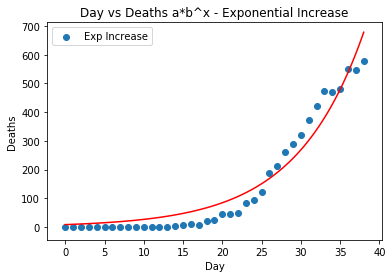

The equation of regression line is y=8.3428*1.1227^x


In [26]:
#increase exp regression
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

def expReg(x, a, b):
    return a * b ** x

popt, pcov = curve_fit(expReg, increasing_df['Days since start'].to_numpy(dtype = 'int64'), 
                       increasing_df['DEATH_COUNT'].to_numpy())
x_plot=np.linspace(0,38,100)
plt.plot(x_plot, expReg(x_plot, *popt), 'r-')

plt.scatter(increasing_df['Days since start'].to_numpy(dtype = 'int64'), increasing_df['DEATH_COUNT'].to_numpy(),
            label='Exp Increase')

plt.title("Day vs Deaths a*b^x - Exponential Increase")
plt.xlabel('Day')
plt.ylabel('Deaths')
plt.legend()
plt.show()
# equation
a=popt[0].round(4)
b=popt[1].round(4)

print(f'The equation of regression line is y={a}*{b}^x')

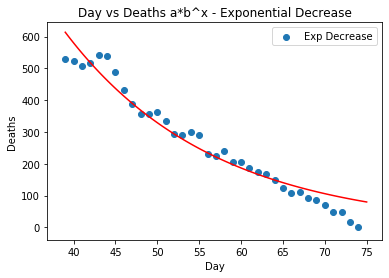

The equation of regression line is y=5594.0902*0.9449^x


In [27]:
#decrease exp regression
popt2, pcov2 = curve_fit(expReg, decreasing_df['Days since start'].to_numpy(dtype = 'int64'), 
                       decreasing_df['DEATH_COUNT'].to_numpy())
x_plot2=np.linspace(39,len(decreasing_df) + 39,100)
plt.plot(x_plot2, expReg(x_plot2, *popt2), 'r-')

plt.scatter(decreasing_df['Days since start'].to_numpy(dtype = 'int64'), decreasing_df['DEATH_COUNT'].to_numpy(),
            label='Exp Decrease')
plt.title("Day vs Deaths a*b^x - Exponential Decrease")
plt.xlabel('Day')
plt.ylabel('Deaths')
plt.legend()
plt.show()

a2=popt2[0].round(4)
b2=popt2[1].round(4)

print(f'The equation of regression line is y={a2}*{b2}^x')

In [98]:
#We will use these models to populate a new dataframe with peak at March 22.
incCollist = list(increasing_df.columns.values)
exdf = pd.DataFrame(columns = incCollist)

for i in range(len(decreasing_df) + len(increasing_df)):
    exdf.loc[i, 'Days since start'] = i
    if (i < len(increasing_df)):
        exdf.loc[i, 'DEATH_COUNT'] = a * (b**i)
    else:
        exdf.loc[i, 'DEATH_COUNT'] = a2 * (b2**i)
exdf['DATE_OF_INTEREST'] = new_df['DATE_OF_INTEREST']
exdf

,DATE_OF_INTEREST,Days since start,DEATH_COUNT
0,2020-02-29 00:00:00,0,8.3428
1,2020-03-01 00:00:00,1,9.36646
2,2020-03-02 00:00:00,2,10.5157
3,2020-03-03 00:00:00,3,11.806
4,2020-03-04 00:00:00,4,13.2546
...,...,...,...
70,2020-05-09 00:00:00,70,105.862
71,2020-05-10 00:00:00,71,100.029
72,2020-05-11 00:00:00,72,94.5171
73,2020-05-12 00:00:00,73,89.3092


In [99]:
#Represents data for March 22 peak

for i in range(len(ex_df)):
    exdf.loc[i, 'DATE_OF_INTEREST'] = pd.Timestamp(exdf.loc[i, 'DATE_OF_INTEREST']) - pd.DateOffset(days=16)
    deaths.loc[i, 'DATE_OF_INTEREST'] = pd.Timestamp(deaths.loc[i, 'DATE_OF_INTEREST'])
print(exdf)



       DATE_OF_INTEREST Days since start DEATH_COUNT
0   2020-02-13 00:00:00                0      8.3428
1   2020-02-14 00:00:00                1     9.36646
2   2020-02-15 00:00:00                2     10.5157
3   2020-02-16 00:00:00                3      11.806
4   2020-02-17 00:00:00                4     13.2546
..                  ...              ...         ...
70  2020-04-23 00:00:00               70     105.862
71  2020-04-24 00:00:00               71     100.029
72  2020-04-25 00:00:00               72     94.5171
73  2020-04-26 00:00:00               73     89.3092
74  2020-04-27 00:00:00               74     84.3883

[75 rows x 3 columns]


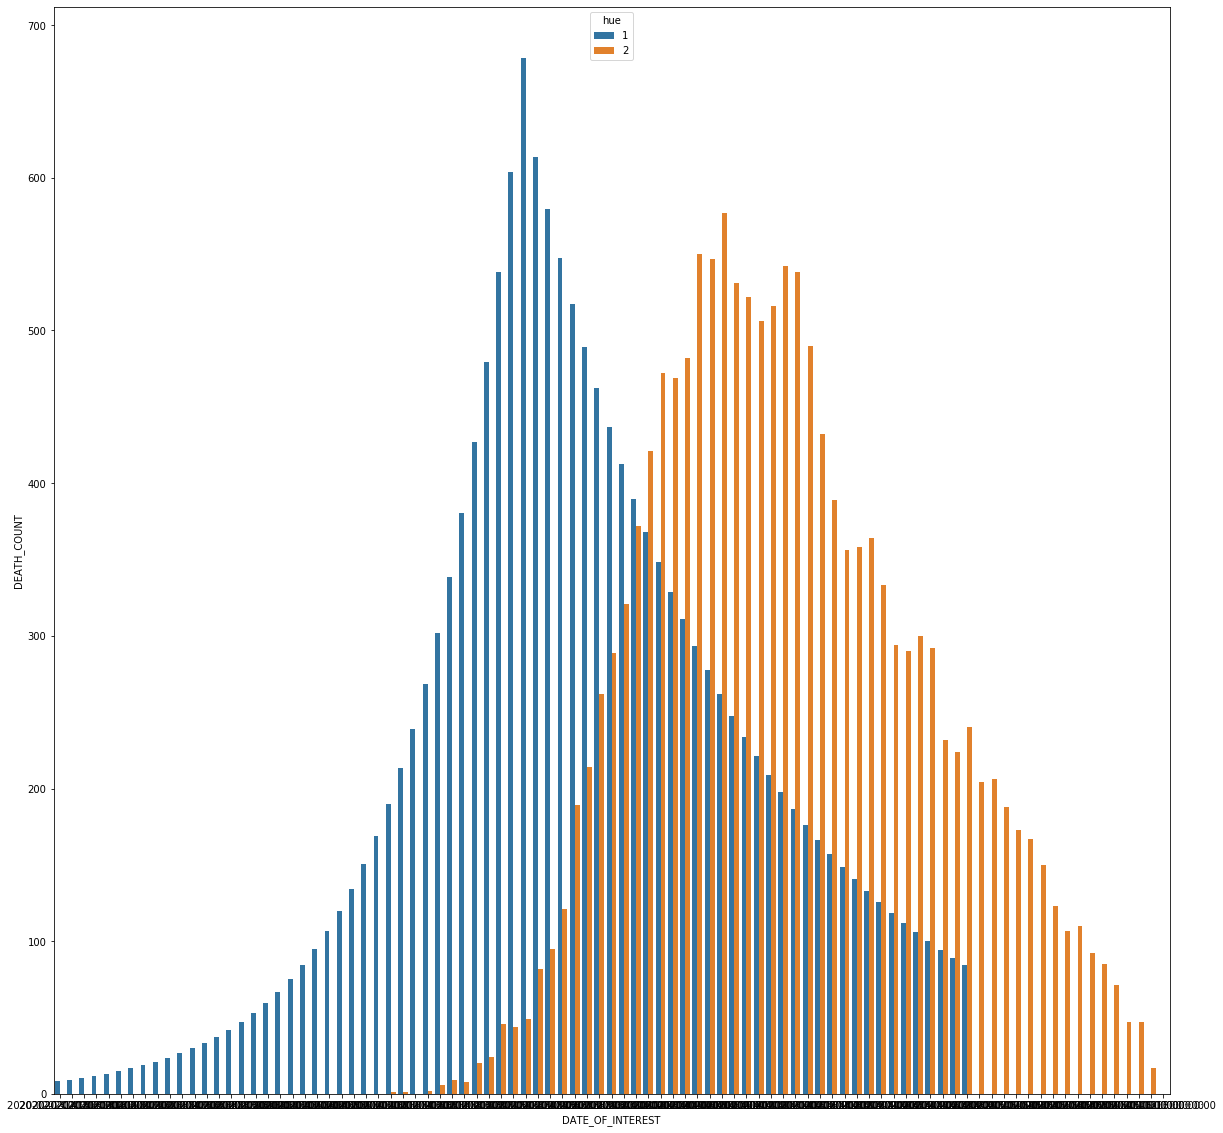

In [111]:


#this is the graph of march 22 peak, hue1 march 22 peak, hue2 original NYC data
import seaborn as sns
exdf['hue'] = 1
deaths['hue'] = 2
res = pd.concat([exdf, deaths], sort = True)
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x='DATE_OF_INTEREST', y = 'DEATH_COUNT', data = res, hue = 'hue')
plt.show()

Text(0.5, 0, 'Date')

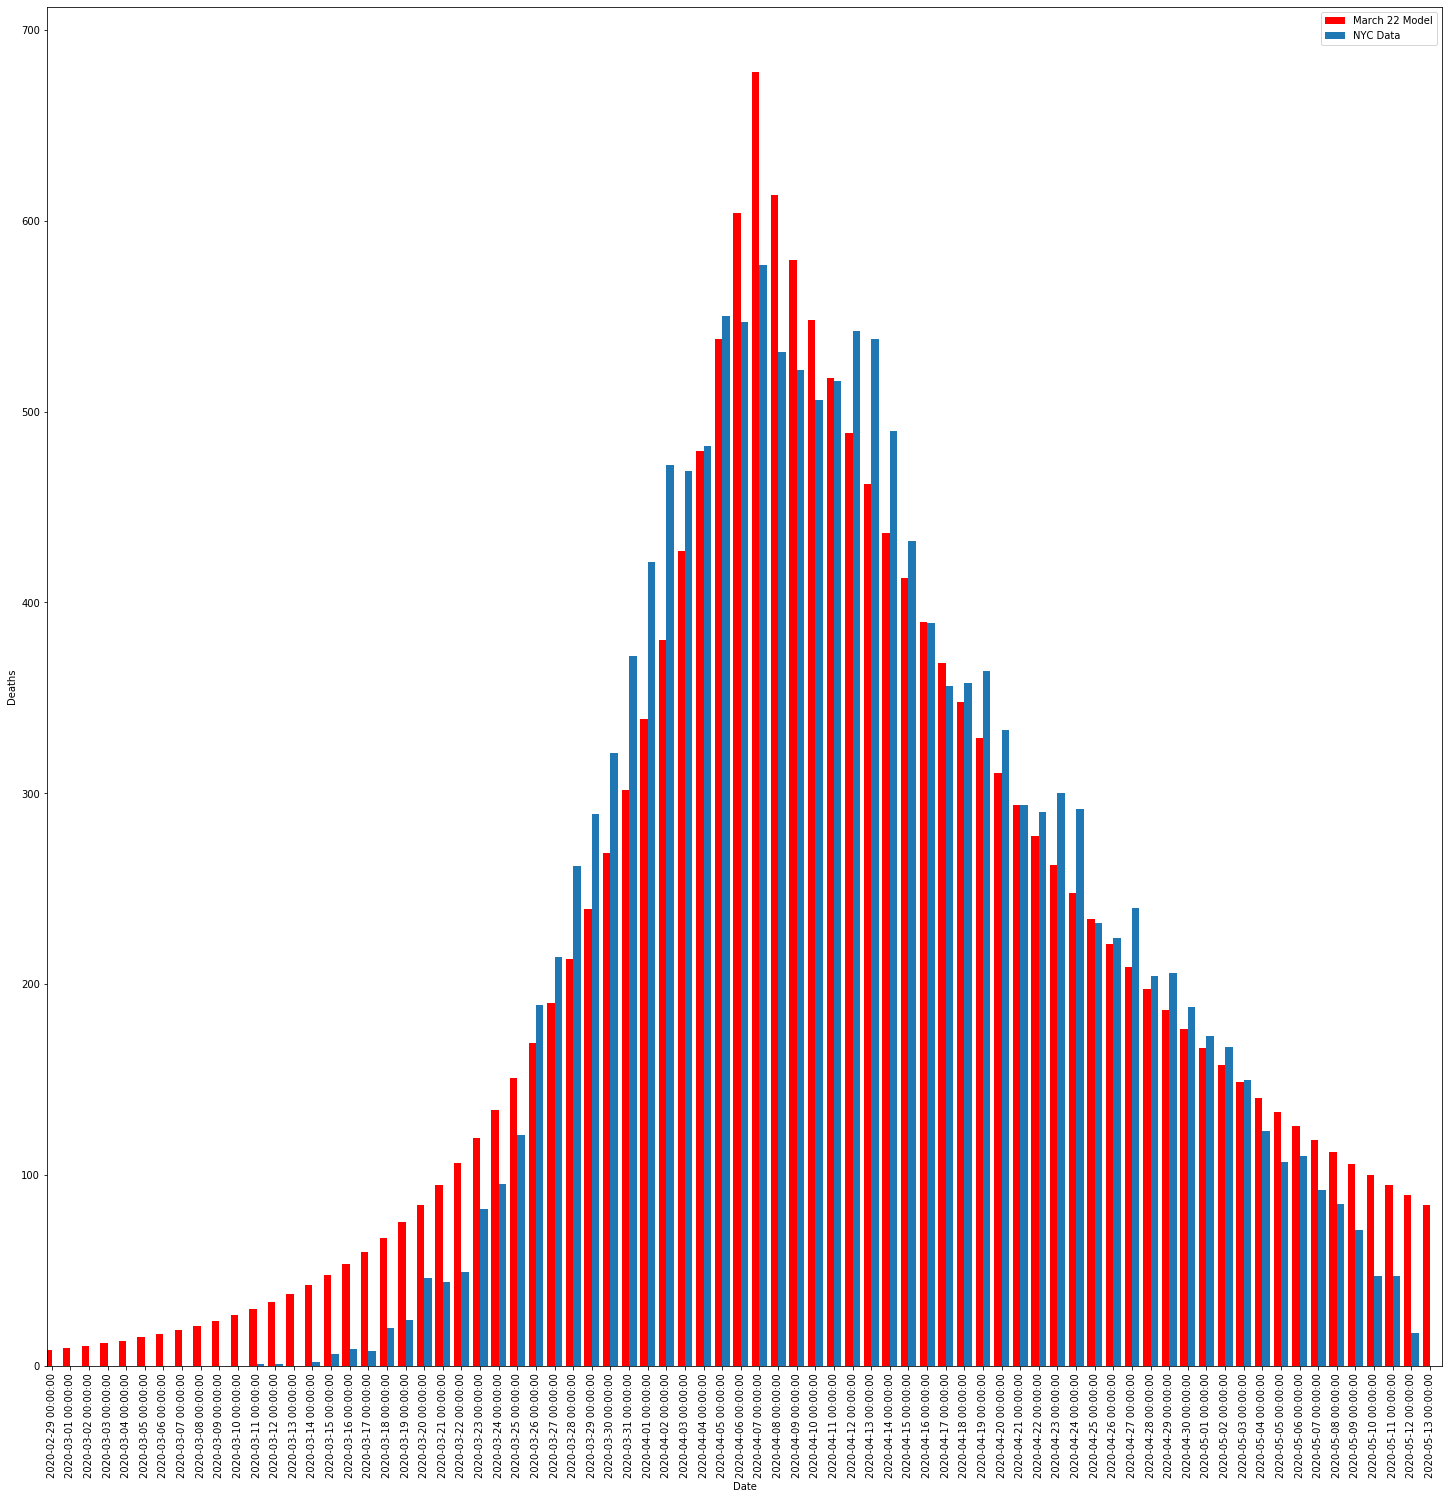

In [121]:

#same data shifted over 14 days
newfig = plt.figure()
ax = newfig.gca()
ax.set_xlim([exdf.loc[0, 'DATE_OF_INTEREST'], deaths.loc[len(deaths)-1,'DATE_OF_INTEREST']])
width = 0.4 
march22peak = exdf.plot(kind='bar', color = 'red', ax = ax, width = width, x='DATE_OF_INTEREST', y='DEATH_COUNT', figsize = (25,25), position = 1)
NYCPLOT = deaths.plot(kind='bar', ax = ax, width = width, x='DATE_OF_INTEREST', y='DEATH_COUNT', figsize = (25,25), position = 0)
ax.legend(['March 22 Model', 'NYC Data'])
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")

#march22 model still needs to be refined

In [142]:
rollMeandf = exdf.drop(['Days since start', 'hue'], axis = 1)
print(type(rollMeandf['DEATH_COUNT']))
rollMeandf['Rolling_Average'] = rollMeandf.iloc[:,1].rolling(window=10).mean()
rollMeandf

<class 'pandas.core.series.Series'>


,DATE_OF_INTEREST,DEATH_COUNT,Rolling_Average
0,2020-02-13 00:00:00,8.3428,NaN
1,2020-02-14 00:00:00,9.36646,NaN
2,2020-02-15 00:00:00,10.5157,NaN
3,2020-02-16 00:00:00,11.806,NaN
4,2020-02-17 00:00:00,13.2546,NaN
...,...,...,...
70,2020-04-23 00:00:00,105.862,138.433633
71,2020-04-24 00:00:00,100.029,130.805940
72,2020-04-25 00:00:00,94.5171,123.598533
73,2020-04-26 00:00:00,89.3092,116.788254


Text(0.5, 0, 'Date')

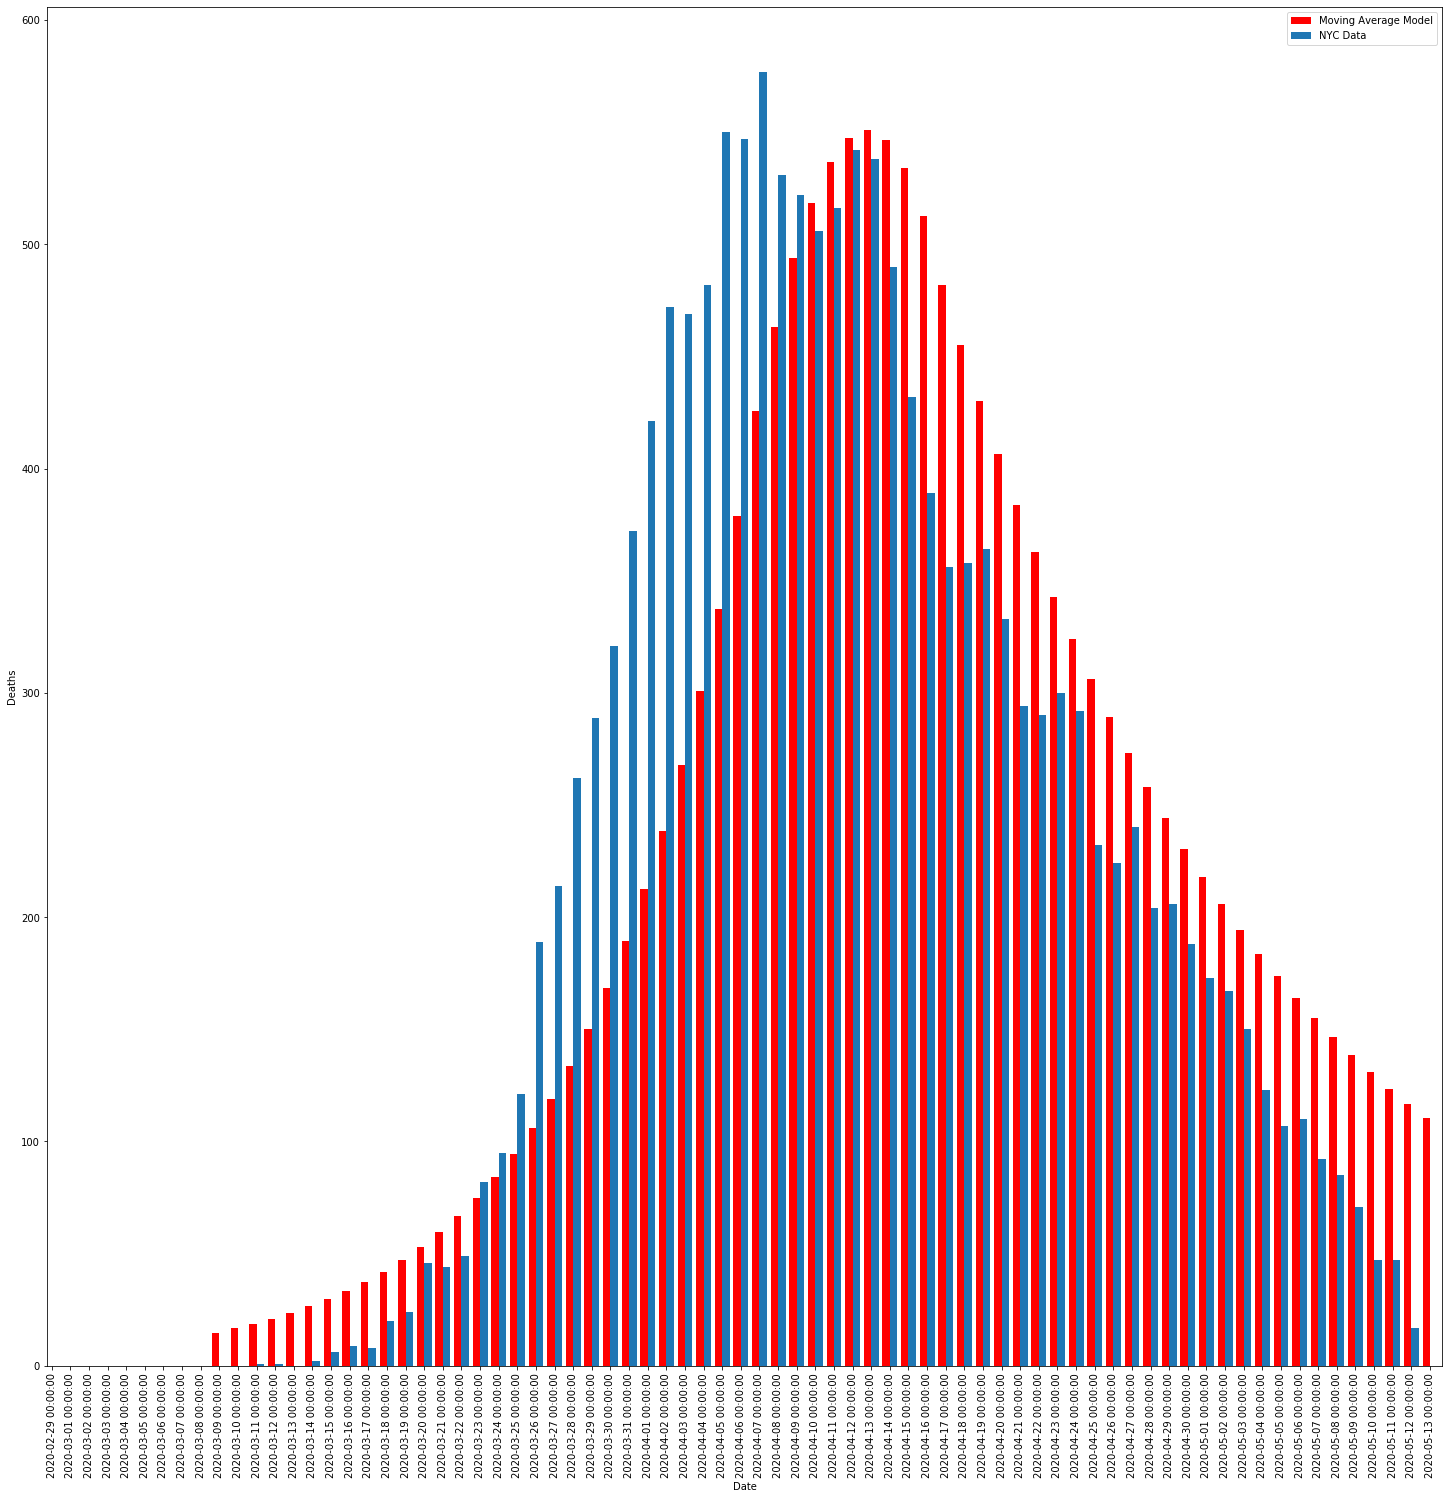

In [143]:
#with 10 day moving average
newfig = plt.figure()
ax = newfig.gca()
ax.set_xlim([exdf.loc[0, 'DATE_OF_INTEREST'], deaths.loc[len(deaths)-1,'DATE_OF_INTEREST']])
width = 0.4 
rolling = rollMeandf.plot(kind='bar', color = 'red', ax = ax, width = width, x='DATE_OF_INTEREST', y='Rolling_Average',
                          figsize = (25,25), position = 1)
NYCPLOT = deaths.plot(kind='bar', ax = ax, width = width, x='DATE_OF_INTEREST', y='DEATH_COUNT', figsize = (25,25), position = 0)
ax.legend(['Moving Average Model', 'NYC Data'])
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")